## Lab 7: Bayes Rule and Bayesian updates to probability

## Exercise 1: numerical calculation of the posterior
The stimulus distribution P(S) is a Gaussian with a mean of 20 and standard deviation of 4. The measurement distribution P(X|S) is Gaussian with standard deviation of 5. A Bayesian observer infers S from an observed measurement Xobs = 30. We are now going to calulate the poserior pdf explictly. 
The vector of hypothesized stimulus values sHyp : 0, .2, .4,...40

In [43]:
import numpy as np
sHyp = np.arange(0,40,0.2)

xObs = 30
sdMeas = 5
meanSig = 20
sdSig = 4

Calculate the likelihood function and the prior on this vector of sHyp values:

In [31]:
prior = 1 / (np.sqrt(2 * np.pi) * sdSig) * np.exp(-(sHyp - meanSig)**2/(2 * sdSig**2))
likelihood = 1 / (np.sqrt(2 * np.pi) * sdMeas) * np.exp(-(sHyp - xObs)**2/(2 * sdMeas**2))

Calculate the posterior, normalize and convert to a probability density and mean of the posterior:

In [46]:
protoPos = prior * likelihood       #multiply to get posterior
normPos = protoPos/sum(protoPos)    #normalize by the sum
probDens = normPos/.2               #divide by step size to get the density
meanPos = (xObs/sdMeas**2 + meanSig/sdSig**2)/(1/sdMeas**2 + 1/sdSig**2)
sdPos = np.sqrt(1/((1/sdMeas**2)+(1/sdSig**2)))

Pos Mean: 29.41176470588235
Pos Sigma: 0.9701425001453319


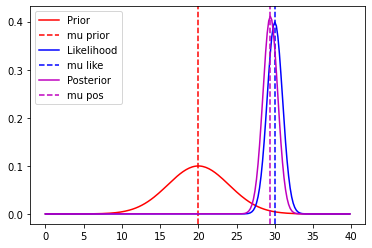

In [47]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(sHyp,prior,label = 'Prior',color = 'r')
plt.axvline(x = meanSig,ls='--',color = 'r', label = 'mu prior')
plt.plot(sHyp,likelihood,label = 'Likelihood',color = 'b')
plt.axvline(x = xObs,ls='--',color = 'b', label = 'mu like')
plt.plot(sHyp,probDens,label = 'Posterior', color = 'm')
plt.axvline(x = meanPos,ls='--', color = 'm', label = 'mu pos')
plt.legend()

print('Pos Mean:', meanPos)
print('Pos Sigma:', sdPos)

Change the standard deviation of the measurement distribution to a very large number, what happens to the posterior now?

Pos Mean: 20.663900414937757
Pos Sigma: 3.864939758404985


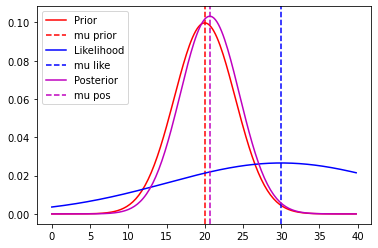

In [51]:
sdMeas = 15

likelihood = 1 / (np.sqrt(2 * np.pi) * sdMeas) * np.exp(-(sHyp - xObs)**2/(2 * sdMeas**2))
meanPos = (xObs/sdMeas**2 + meanSig/sdSig**2)/(1/sdMeas**2 + 1/sdSig**2)
sdPos = np.sqrt(1/((1/sdMeas**2)+(1/sdSig**2)))

protoPos = prior * likelihood       #multiply to get posterior
normPos = protoPos/sum(protoPos)    #normalize by the sum
probDens = normPos/.2               #divide by step size to get the density

plt.figure()
plt.plot(sHyp,prior,label = 'Prior',color = 'r')
plt.axvline(x = meanSig,ls='--',color = 'r', label = 'mu prior')
plt.plot(sHyp,likelihood,label = 'Likelihood',color = 'b')
plt.axvline(x = xObs,ls='--',color = 'b', label = 'mu like')
plt.plot(sHyp,probDens,label = 'Posterior', color = 'm')
plt.axvline(x = meanPos,ls='--', color = 'm', label = 'mu pos')
plt.legend()

print('Pos Mean:', meanPos)
print('Pos Sigma:', sdPos)

Now change the standard deviation of the measurement distribution to a very small number, what happens to the posterior?

Pos Mean: 29.41176470588235
Pos Sigma: 0.9701425001453319


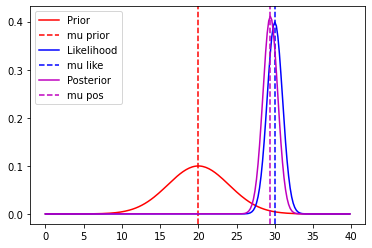

In [52]:
sdMeas = 1

likelihood = 1 / (np.sqrt(2 * np.pi) * sdMeas) * np.exp(-(sHyp - xObs)**2/(2 * sdMeas**2))
meanPos = (xObs/sdMeas**2 + meanSig/sdSig**2)/(1/varMeas**2 + 1/sdSig**2)
sdPos = np.sqrt(1/((1/sdMeas**2)+(1/sdSig**2)))

protoPos = prior * likelihood       #multiply to get posterior
normPos = protoPos/sum(protoPos)    #normalize by the sum
probDens = normPos/.2               #divide by step size to get the density

plt.figure()
plt.plot(sHyp,prior,label = 'Prior',color = 'r')
plt.axvline(x = meanSig,ls='--',color = 'r', label = 'mu prior')
plt.plot(sHyp,likelihood,label = 'Likelihood',color = 'b')
plt.axvline(x = xObs,ls='--',color = 'b', label = 'mu like')
plt.plot(sHyp,probDens,label = 'Posterior', color = 'm')
plt.axvline(x = meanPos,ls='--', color = 'm', label = 'mu pos')
plt.legend()

print('Pos Mean:', meanPos)
print('Pos Sigma:', sdPos)

## Exercise 2: conditional and marginal probability (prosecutor fallacy)

You are receiving a test for a relatively rare disease. The test is fairly accurate--if you have the disease, the test will most likely (sensitivity = 0.9) report a positive result, and if you don't have it, the test will most likely (specificity = 0.8) report a negative result. However, in the absence of a test, you are unlikely to have the disease, as only 2% of the population has it. Now suppose you take a test, and the result is positive. How likely are you to actually have the disease? Solve this in two ways:
1. Simulate this scenario for many trials, and count the number of times the positive subjects have the disease relative to total positive counts.
2. Calculate the probability theoretically using Bayes' rule.

In [2]:
#Parameters
sensitivity = 0.9 #probability of positive test given disease
specificity = 0.8 #probability of negative test given no disease
prevalence = 0.02 #probability of having the disease 

In [3]:
#Method 1: simulate

#your code here
n = 100000
outcome_table = np.zeros((2, 2)) # counts for has disease? X tests positive?
for i_trial in range(n):
    
    #disease = 1 if has disease, otherwise 0
    disease = np.random.binomial(1, prevalence)
    
    #test = 1 if tests positive, otherwise 0
    if disease == 0:
        test = np.random.binomial(1, 1 - specificity)
    elif disease == 1:
        test = np.random.binomial(1, sensitivity)
    
    outcome_table[disease, test] += 1

#The empirical probability of having the disease given that you received a positive test
#is the relative counts of outcome_table[1, 1] / (outcome_table[0, 1] + outcome_table[1, 1]),
#i.e. the number of test subjects who have the disease and tested positive divided by the total
#number of subjects who tested positive, with or without the disease.

prob_disease_given_positive = outcome_table[1, 1] / (outcome_table[0, 1] + outcome_table[1, 1])
print(prob_disease_given_positive)

0.0836666356617989


In [4]:
#Method 2: use Bayes' rule

#your code here

#Below is the formula for Bayes' rule

#prob_disease_given_positive = prob_positive_given_disease * prob_disease / (prob_positive)
#prob_positive = prob_true_positive + prob_false_positive
#              = prevalence * sensitivity + (1 - prevalence) * (1 - specificity)

prob_positive_given_disease = sensitivity
prob_disease = prevalence
prob_positive = (prevalence * sensitivity + (1 - prevalence) * (1 - specificity))

prob_disease_given_positive = prob_positive_given_disease * prob_disease / (prob_positive)
print(prob_disease_given_positive)

0.0841121495327103


Are these values bigger or smaller than you would have thought? Can you explain why? Are the conditions of having the disease and not having the disease symmetric? What is the primary asymmetry about these outcomes?

In [5]:
#Bonus exercise: What about the probability you *don't* have the disease if you test negative?
#Is this also small? Is the test just worse than advertised?

### Exercise 3: binomial

Suppose we collected $N$ flips of a coin with true probability $p$ of coming up heads. We count the number of heads we actually observe, $n$. Compute the mean and standard deviation of $n$ by 3 different methods:
1. The "Look it up" method--use "binom" in the scipy.stats module and create a distribution with given parameter values, then access the means and standard deviations computed for you.
2. Manually compute the probability distribution $P(n)$ over the number of heads $n \in \{0, 1, \cdots, N\}$ and compute the mean and standard deviation from that.
3. Compute the mean and standard deviation theoretically using the mean and std for *an individual coin flip* and considering the binomial as a sum over many independent coin flips.

In [6]:
from scipy.stats import binom

#Parameters
N = 10
p = 4 / 10

In [7]:
#Method 1: look it up using binom.stats

#your code here
mean, var = binom.stats(N, p)

print('The mean is {:.2f}'.format(mean))
print('The standard deviation is {:.2f}'.format(np.sqrt(var)))

The mean is 4.00
The standard deviation is 1.55


In [9]:
#Method 2: compute probability distribution
#hint: use the n choose k function defined below:

def n_choose_k(n, k):
    """Warning: this is not an efficient way to compute this! Nice cancellation happens
    that we are ignoring."""
    
    return np.math.factorial(n) / (np.math.factorial(n - k) * np.math.factorial(k))

n = np.arange(0, N + 1, 1)
P_n = np.zeros(N + 1)
for i_n, n_ in enumerate(n): #Yes i_n = n_ but think of them as index vs. number of heads
    
    #your code here ------
    P_n[i_n] =  n_choose_k(N, n_) * (p ** n_) * ((1 - p) ** (N - n_))
    #---------------------
    
mean = P_n.dot(n)
var = P_n.dot(n**2) - mean ** 2

print('The mean is {:.2f}'.format(mean))
print('The standard deviation is {:.2f}'.format(np.sqrt(var)))

The mean is 4.00
The standard deviation is 1.55


In [10]:
#Method 3: compute based on single coin flip
#hint: the Bernoulli mean is p and the Bernoulli variance is p * (1 - p)

bernoulli_mean = p
bernoulli_var = p * (1 - p)

#your code here
mean = N * bernoulli_mean
var = N * bernoulli_var

print('The mean is {:.2f}'.format(mean))
print('The standard deviation is {:.2f}'.format(np.sqrt(var)))

The mean is 4.00
The standard deviation is 1.55


#### Exercise 4: Bayesian updating (Beta and Bernoulli distribution)
What if we don't know $p$? Can we *infer* $p$ based on coin flip outcomes? Can we be certain based on finite data? What if we simply know that our coin is fair, before observing any flips? (E.g. maybe we can just tell by looking at it the coin is perfectly symmetric, and no amount of data will change our minds.) Does our interpretation of the data change? What if, on the other hand, the "coin" being tossed is some other physical process that we could easily imagine is not 50-50?

The Bayesian approach is to treat $p$ as itself a random variable. One might argue philosophically that $p$ is fixed but simply unknown, and it's a fallacy to model $p$ as the outcome of some random variable. The Bayesians disagree, and they're fine with treating "uncertainty" and "randomness" with the same math---probability distributions over possibilities---and even having them interact! The coin flips are obviously "random," whereas the parameter $p$ may simply be "unknown," but we can still model our uncertainty about $p$ using a probability distribution over the interval $[0, 1]$.

The point of the first paragraph is that our *prior* probability of $p$ matters. If we were 100% confident the coin is 50-50 (say based on physical measurements), we could flip 10 heads in a row and be amused at how unlikely that outcome was---yet still believe as certainly as before that $p = 0.5$. What if, on the other hand, we went in with an open mind? What if our prior probability was that $p$ could be any value between 0 and 1 with equal probability? Then how does observing some sequence of heads and tails *update* our initial belief? Let's start with one coin flip:

$$
\text{Prior: } P(p) = 1 \\
\text{Likelihood: } P(H | p) = p \\
\text{Posterior: } P(p | H) = \frac{P(H | p) P(p)}{P(H)} = \frac{p \times 1}{\int_0^1 P(H|p) P(p) dp} = \frac{p}{\int_0^1 p dp} = 2p
$$

#### The Beta distribution

The Beta distribution was designed to handle this specific inference problem. The Beta distribution has 2 parameters, $\alpha$ and $\beta$. By definition, the distribution $\text{Beta}_{\alpha, \beta}(p)$ gives the probability of $p$ given the observation of $\alpha - 1$ heads and $\beta - 1$ tails, assuming you started with a *flat* prior distribution on $p$.

For this exercise, generate iteratively individual Bernoulli outcomes from a distribution with some (ground-truth) $p$ parameter. As you get each outcome, update the *posterior* distribution over $p$ incorporating each new outcome, by two methods and verify they get the same answer:
1. Taking a Beta distribution out of the box using scipy.stats module and changing the $\alpha$ and $\beta$ values.
2. Using Bayes rule on the previous posterior in light of the new observation.

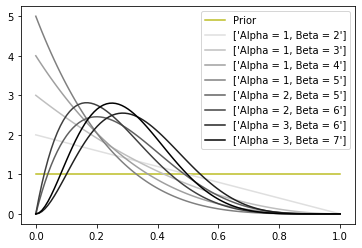

In [19]:
#Method 1: Beta out of the box
from scipy.stats import beta

p_axis = np.linspace(0, 1, 100)
Beta = beta(1, 1) #flat prior
plt.figure()
plt.plot(p_axis, Beta.pdf(p_axis), color='C8')

#Ground truth p
p = 0.3 #you can change this value!
N_samples = 8 #play with this value as well
alpha_ = 1
beta_ = 1
legend = ['Prior']
for i_sample in range(N_samples):
    
    outcome = np.random.binomial(1, p)
    
    #Update alpha_ and beta_, get new Beta pdf
    
    #your code here -----------------
    if outcome == 1:
        alpha_ += 1
    elif outcome == 0:
        beta_ += 1
    Beta = beta(alpha_, beta_)
    # -------------------------------
    
    legend.append(['Alpha = {}, Beta = {}'.format(alpha_, beta_)])
    
    gray_scale = 1 - (i_sample + 1) / N_samples
    plt.plot(p_axis, Beta.pdf(p_axis), color=(str(gray_scale)))
plt.legend(legend)

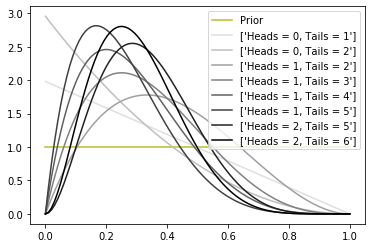

In [23]:
#Method 2: Bayes rule
p_axis = np.linspace(0, 1, 100)
dp = p_axis[1] - p_axis[0]

#really this is the "prior" but we'll be recursively updating it
posterior = np.ones_like(p_axis)

plt.figure()
plt.plot(p_axis, posterior, color='C8')

#Ground truth p
p = 0.3 #you can change this value!
N_samples = 8 #play with this value as well
heads = 0
tails = 0
legend = ['Prior']
for i_sample in range(N_samples):
    
    outcome = np.random.binomial(1, p)
    
    #Update posterior using Bayes rule
    
    #your code here -----------------
    if outcome == 1:
        heads += 1
        posterior = p_axis * posterior / (np.sum(p_axis * posterior * dp))
    elif outcome == 0:
        tails += 1
        posterior = (1 - p_axis) * posterior / (np.sum((1 - p_axis) * posterior * dp))
    # -------------------------------
    
    legend.append(['Heads = {}, Tails = {}'.format(heads, tails)])
    
    gray_scale = 1 - (i_sample + 1) / N_samples
    plt.plot(p_axis, posterior, color=(str(gray_scale)))
plt.legend(legend)

#### Exercise 5: Bayesian updating (normal distribution)

The above exercise shows that the "conjugate" distribution to the binomial is the beta, since our posterior of the bionimal parameters given binomial observation follows a beta distribution. In this exercise we will show the conjugate of the normal distribution is... the normal distribution!

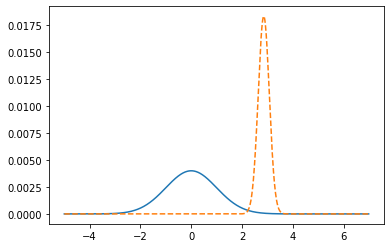

In [41]:
#Pick a mean and standard deviation for your prior distribution
priormean = 0
priorvar = 1

#Pick a set of parameters from which you will draw your samples (number % of samples and mean).
#You might as well use the common variance, since that's what we are assuming
N = 20
datamean = 3

#Draw a sample
priorsd = np.sqrt(priorvar)
sample = np.random.normal(datamean, priorsd, N)

#Compute the prior over a fine, discrete set of values that is wide
#enough to encompass all samples and most of the probability mass
x = np.arange(-5, 7, 0.01)
nsample = len(x)
prior = 1 / (np.sqrt(2 * np.pi) * priorsd) * np.exp(-(x - priormean)**2/(2 * priorvar))

#Compute the posterior using Bayes Rule, normalizing both prior and
#posterior to sum to one over the discrete points
deltaxs = np.multiply.outer(sample, np.ones(nsample)) - (np.array(N * [list(x)]))
probvalues = (1/(np.sqrt(2 * np.pi) * priorsd)) * np.exp(-deltaxs**2/(2 * priorvar))
likelihood = np.prod(probvalues, axis=0)
posterior = likelihood * prior
prior = prior/sum(prior)
posterior = posterior/sum(posterior)

#Plot prior and posterior
plt.plot(x,prior,'-')
plt.plot(x,posterior,'--')

#EXERCISE: Play with this, examining what happens as the sample deviates more and
#more from the mean of the prior, and as the sample size increase